# Overall demand:

To get overall demand trends, we group products by dates, and get the sales count of each product per day. 
This can help with overall prediction or forecasting of trends. 

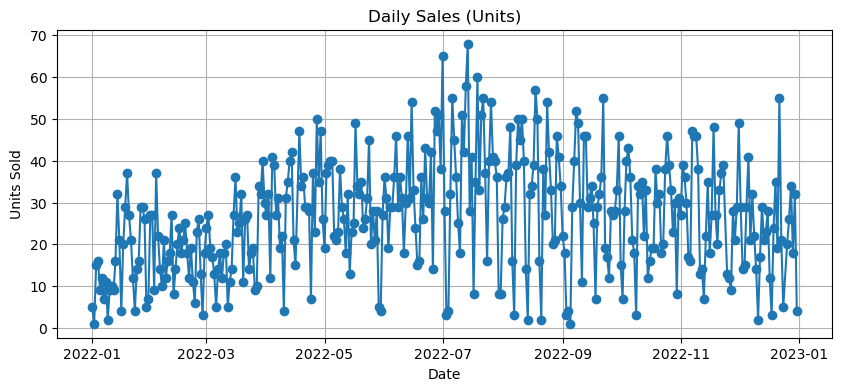

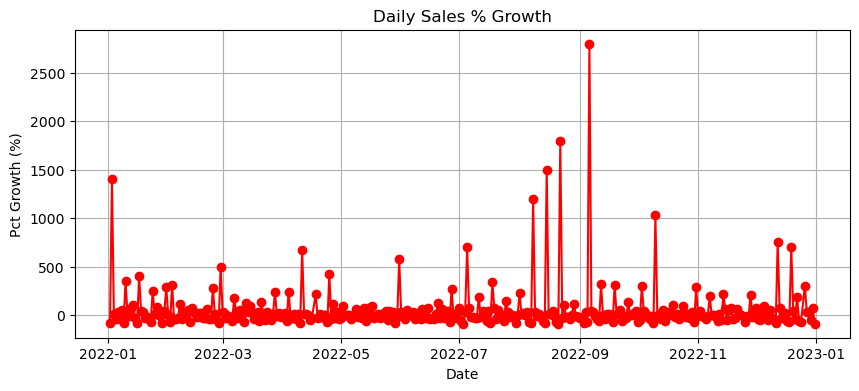

,TransDate,SalesCount,PctGrowth
0,2022-01-01,5,NaN
1,2022-01-02,1,-80.000000
2,2022-01-03,15,1400.000000
3,2022-01-04,16,6.666667
4,2022-01-05,9,-43.750000
...,...,...,...
357,2022-12-27,26,30.000000
358,2022-12-28,34,30.769231
359,2022-12-29,18,-47.058824
360,2022-12-30,32,77.777778


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load
df = pd.read_csv("../vending_machine_sales.csv")

# Convert dates
df["TransDate"] = pd.to_datetime(df["TransDate"], errors="coerce")

# Get sales per product per day (each row = 1 unit sold)
sales_per_product = (
    df.groupby(["Product", "TransDate"])
      .size()
      .reset_index(name="SalesCount")
)

# Aggregate across all products for total daily sales
daily_sales = (
    sales_per_product.groupby("TransDate")["SalesCount"]
    .sum()
    .reset_index()
)

# Calculate pct growth in daily sales
daily_sales["PctGrowth"] = daily_sales["SalesCount"].pct_change() * 100

# Plot absolute daily sales
plt.figure(figsize=(10,4))
plt.plot(daily_sales["TransDate"], daily_sales["SalesCount"], marker="o")
plt.title("Daily Sales (Units)")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.grid(True)
plt.show()

# Plot % growth
plt.figure(figsize=(10,4))
plt.plot(daily_sales["TransDate"], daily_sales["PctGrowth"], marker="o", color="red")
plt.title("Daily Sales % Growth")
plt.xlabel("Date")
plt.ylabel("Pct Growth (%)")
plt.grid(True)
plt.show()

display(daily_sales)


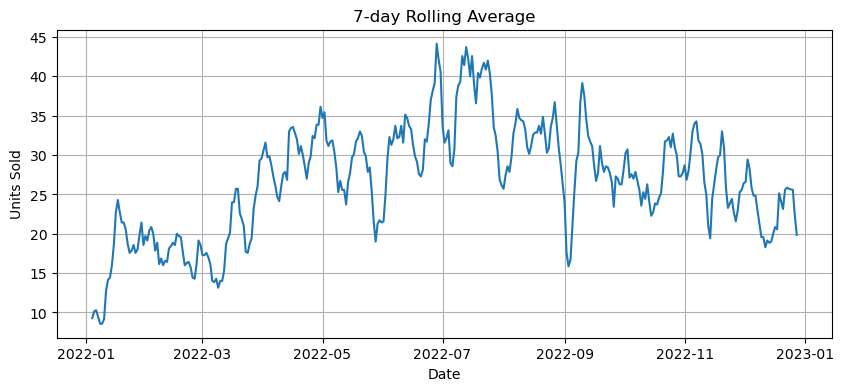

In [10]:
daily_sales["Smoothed"] = daily_sales["SalesCount"].rolling(window=7, center=True).mean()

plt.figure(figsize=(10,4))
plt.plot(daily_sales["TransDate"], daily_sales["Smoothed"])
plt.title("7-day Rolling Average")
plt.xlabel("Date"); plt.ylabel("Units Sold")
plt.grid(True)
plt.show()

In [ ]:
# Exponential moving average (14-day span)
daily_sales["EMA"] = daily_sales["SalesCount"].ewm(span=14, adjust=False).mean()

plt.figure(figsize=(10,4))
plt.plot(daily_sales["TransDate"], daily_sales["EMA"])
plt.title("14-day Exponential Moving Average")
plt.xlabel("Date"); plt.ylabel("Units Sold")
plt.grid(True)
plt.show()

# Overall 
